## Detector model: 3-level system

In [298]:
from sympy import *
#from sympy.physics.matrices import mdft
from sympy.physics.quantum import TensorProduct
from sympy.functions.special.delta_functions import Heaviside
from sympy.physics.quantum.dagger import Dagger

from sympy.stats import ContinuousRV, variance, std

from sympy.plotting import plot, plot3d_parametric_line

import numpy as np

import scipy.integrate

import matplotlib
import matplotlib.pyplot as plt

# matplotlib.rcParams['text.usetex'] = False

# https://matplotlib.org/gallery/mplot3d/lines3d.html?highlight=parametric
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

In [299]:
from IPython.display import display, Latex #, Math

In [300]:
init_printing ()

In [301]:
gamma = Symbol('gamma', real=True, positive=True)
t = Symbol('t', real=True)
tprime = Symbol('t\'', real=True)
omega = Symbol('omega', real=True)
nu = Symbol('nu', real=True)

In [302]:
H = Rational(1, 2) * Matrix([
    [0,     0,    1-1*I],
    [0,     0,     -1*I],
    [1+1*I, 1*I,      0]
])

In [303]:
H.eigenvects()

⎡                        ⎛         ⎡⎡      ⎛1   ⅈ⎞ ⎤⎤⎞  ⎛       ⎡⎡     ⎛1   ⅈ⎞
⎢                        ⎜         ⎢⎢-2⋅√3⋅⎜─ - ─⎟ ⎥⎥⎟  ⎜       ⎢⎢2⋅√3⋅⎜─ - ─⎟
⎢⎛      ⎡⎡   ⎛1   ⅈ⎞⎤⎤⎞  ⎜         ⎢⎢      ⎝2   2⎠ ⎥⎥⎟  ⎜       ⎢⎢     ⎝2   2⎠
⎢⎜      ⎢⎢-ⅈ⋅⎜─ - ─⎟⎥⎥⎟  ⎜         ⎢⎢──────────────⎥⎥⎟  ⎜       ⎢⎢────────────
⎢⎜      ⎢⎢   ⎝2   2⎠⎥⎥⎟  ⎜-√3      ⎢⎢      3       ⎥⎥⎟  ⎜√3     ⎢⎢     3      
⎢⎜0, 1, ⎢⎢          ⎥⎥⎟, ⎜────, 1, ⎢⎢              ⎥⎥⎟, ⎜──, 1, ⎢⎢            
⎢⎜      ⎢⎢    1     ⎥⎥⎟  ⎜ 2       ⎢⎢     √3⋅ⅈ     ⎥⎥⎟  ⎜2      ⎢⎢   -√3⋅ⅈ    
⎢⎜      ⎢⎢          ⎥⎥⎟  ⎜         ⎢⎢     ────     ⎥⎥⎟  ⎜       ⎢⎢   ──────   
⎢⎝      ⎣⎣    0     ⎦⎦⎠  ⎜         ⎢⎢      3       ⎥⎥⎟  ⎜       ⎢⎢     3      
⎢                        ⎜         ⎢⎢              ⎥⎥⎟  ⎜       ⎢⎢            
⎣                        ⎝         ⎣⎣      1       ⎦⎦⎠  ⎝       ⎣⎣     1      

⎤⎤⎞⎤
⎥⎥⎟⎥
⎥⎥⎟⎥
⎥⎥⎟⎥
⎥⎥⎟⎥
⎥⎥⎟⎥
⎥⎥⎟⎥
⎥⎥⎟⎥
⎥⎥⎟⎥
⎥⎥⎟⎥
⎦⎦⎠⎦

In [304]:
U_t = exp(-I*H*t)

In [305]:
psi_0 = Matrix([2, 1+I, 0])/sqrt(6)
psi_0 = Matrix([1, 1, 0])/sqrt(2)
psi_0

⎡√2⎤
⎢──⎥
⎢2 ⎥
⎢  ⎥
⎢√2⎥
⎢──⎥
⎢2 ⎥
⎢  ⎥
⎣0 ⎦

In [306]:
unitary_psi_t = U_t @ psi_0

In [307]:
unitary_psi_t

⎡   ⎛                   √3⋅ⅈ⋅t                                          -√3⋅ⅈ⋅
⎢   ⎜                   ──────                                          ──────
⎢   ⎜  ⎛1   ⅈ⎞ ⎛1   ⅈ⎞    2        ⎛1   ⅈ⎞ ⎛1   ⅈ⎞     ⎛1   ⅈ⎞ ⎛1   ⅈ⎞     2  
⎢   ⎜2⋅⎜─ - ─⎟⋅⎜─ + ─⎟⋅ℯ         2⋅⎜─ - ─⎟⋅⎜─ + ─⎟   2⋅⎜─ - ─⎟⋅⎜─ + ─⎟⋅ℯ      
⎢   ⎜  ⎝2   2⎠ ⎝2   2⎠             ⎝2   2⎠ ⎝2   2⎠     ⎝2   2⎠ ⎝2   2⎠        
⎢√2⋅⎜───────────────────────── + ───────────────── + ─────────────────────────
⎢   ⎝            3                       3                        3           
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                       2                                     
⎢                                                                             
⎢                         ⎛             √3⋅ⅈ⋅t                            -√3⋅
⎢                         ⎜             ──────                            ────
⎢                         ⎜    ⎛1   ⅈ⎞    2         

In [308]:
prob_t = Matrix([0, 0, 0])
for i in 0, 1, 2:
    prob_t[i] = abs(unitary_psi_t[i])**2

In [309]:
prob_t

⎡                        √3⋅ⅈ⋅t                         √3⋅ⅈ⋅t                
⎢   √3⋅ⅈ⋅t            2  ──────      √3⋅ⅈ⋅t          2  ──────            2   
⎢   ──────     ⎛1   ⅈ⎞     2         ──────   ⎛1   ⅈ⎞     2        ⎛1   ⅈ⎞   √
⎢     2      ⅈ⋅⎜─ - ─⎟ ⋅ℯ              2      ⎜─ - ─⎟ ⋅ℯ         ⅈ⋅⎜─ - ─⎟ ⋅ℯ 
⎢  ℯ           ⎝2   2⎠            ⅈ⋅ℯ         ⎝2   2⎠              ⎝2   2⎠    
⎢- ─────── - ────────────────── - ───────── - ──────────────── + ─────────────
⎢     36             18               36             18                  9    
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

In [310]:
simplify(
    prob_t[0] + prob_t[1] + prob_t[2]
)

In [311]:
unitary_psi_n = lambdify(t, unitary_psi_t, 'numpy')
_prob_n = lambdify(t, prob_t, 'numpy')
def prob_n(_t):
    return np.real(_prob_n(_t))

In [312]:
def phase_color(_z):
    return np.imag(_z)

<!--
#### Complex argument color code
* <span style="color: #fe0">__Yellow__</span> (or generally the "highest"): imaginary, positive
* <span style="color: #086">__Green__ </span> (or generally the "midrange"): real
* <span style="color: #408">__Purple__</span> (or generally the "lowest"): imaginary, negative
-->

In [313]:
TMIN, TMAX = 0, 3*pi/sqrt(2)
TMIN_N, TMAX_N = float(TMIN), float(TMAX)

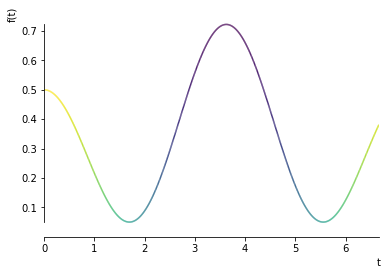

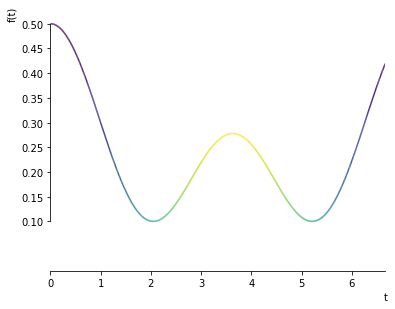

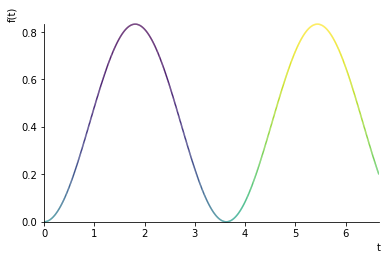

In [314]:
for i in 0, 1, 2:
    pl = plot(
        prob_t[i],
        (t, TMIN, TMAX),
        adaptive=False, nb_of_points=1000, show=False)
    # Need the numeric version to customize color function
    pl[0].line_color = lambda _t: phase_color( unitary_psi_n(_t)[i] )
    pl.axis_center = (0, 0)
    pl.show()

In [315]:
NPLOTPOINTS = 1000

In [316]:
times = np.linspace(TMIN_N, TMAX_N, num=NPLOTPOINTS)
times_more = np.linspace(TMIN_N, 12*TMAX_N, num=NPLOTPOINTS)
times_extended = np.linspace(TMIN_N, 40*TMAX_N, num=NPLOTPOINTS)

In [317]:
probs = np.zeros((3, NPLOTPOINTS))

In [318]:
probs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [319]:
for i in 0, 1, 2:
    probs[i] = prob_n(times)[i]

In [320]:
UNISYM = {
    'psi': u'\u03C8',
    '^2' : u'\u00B2'
}
PROB_LABELS     = ['', '', '']
PROB_AMP_LABELS = ['', '', '']
                
for i in 0, 1, 2:
    PROB_AMP_LABELS[i] = '<' + str(i) + '|' + UNISYM['psi'] + '>'
    PROB_LABELS[i]     = '|' + PROB_AMP_LABELS[i] + '|' + UNISYM['^2']

https://matplotlib.org/gallery/lines_bars_and_markers/stackplot_demo.html#sphx-glr-gallery-lines-bars-and-markers-stackplot-demo-py

In [321]:
prob_stack = np.vstack(probs)

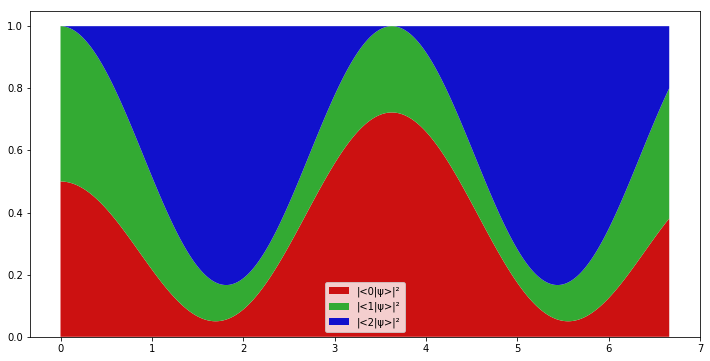

In [322]:
labels = PROB_LABELS
colors = ["#cc1111", "#33aa33", "#1111cc"]

fig, ax = plt.subplots(figsize=(12, 6))
ax.stackplot(times, probs[0], probs[1], probs[2], labels=labels, colors=colors)
ax.legend(loc='lower center')
plt.show()

In [323]:
rgbs = []
for i in range(NPLOTPOINTS):
    rgbs.append(
        (
            probs[0][i],
            probs[1][i],
            probs[2][i]
        )
    )

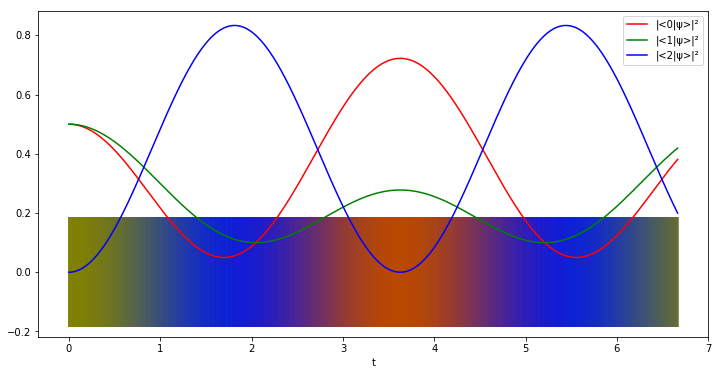

In [324]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('t')
ax.scatter(times, np.zeros(NPLOTPOINTS),
            c=rgbs, marker='|', s=12000)

# "virtual", don't really want to show, only for legend
_c = ['r', 'g', 'b']
for i in 0, 1, 2:
    ax.plot(
        times, probs[i],
        c=_c[i],
        #linewidth=1,
    )
    
ax.legend(
    PROB_LABELS,
    loc='upper right'
)

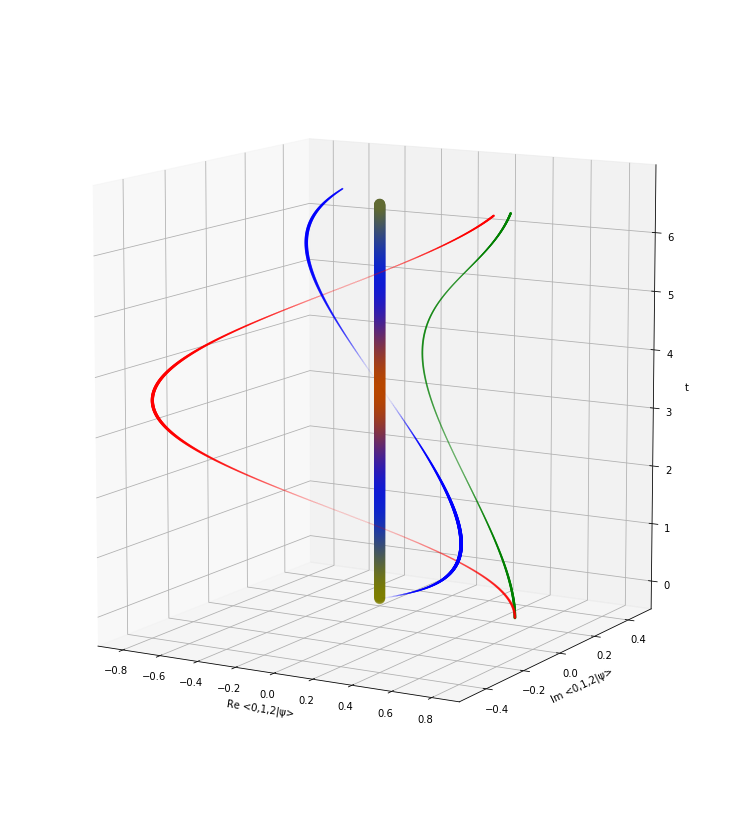

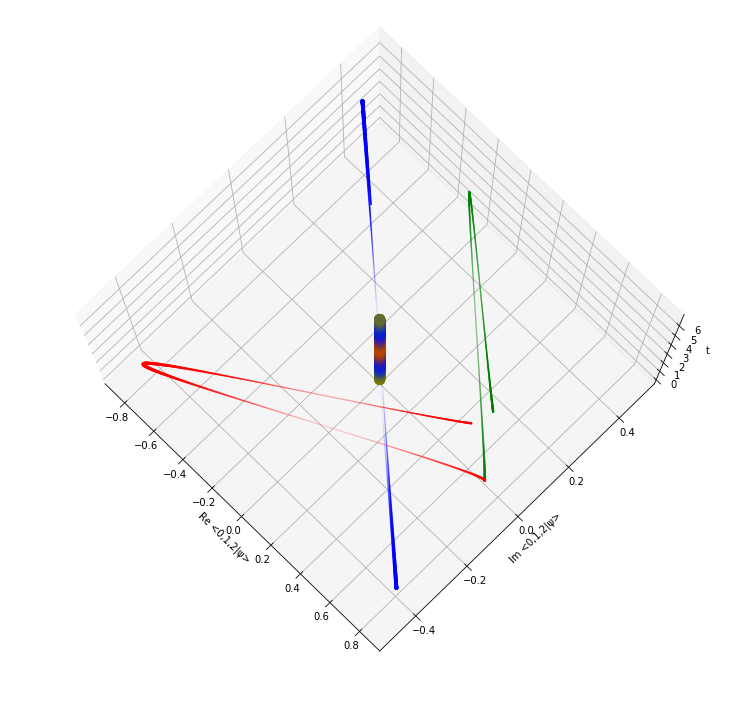

In [325]:
# 3D parametric plot
for (vertical_angle, horizontal_angle, height, width) in (10, -60, 15, 13), (80, -45, 13, 13):
    fig = plt.figure(figsize=(width, height))


    ax = fig.gca(projection='3d')

    ax.view_init(vertical_angle, horizontal_angle) # rotate 3d point of view

    ax.set_xlabel('Re <0,1,2|\u03C8>')
    ax.set_ylabel('Im <0,1,2|\u03C8>')
    ax.set_zlabel('t')

    ax.scatter(
        np.zeros(NPLOTPOINTS, dtype=np.float),
        np.zeros(NPLOTPOINTS, dtype=np.float),
        times,

        c = rgbs,
        s = 100
    )
    for i in 0, 1, 2:
        ax.scatter(
            np.real(unitary_psi_n(times)[i][0]),
            np.imag(unitary_psi_n(times)[i][0]),
            times,

            marker = '.',
            #depthshade=False,
            s = (probs[i]**2)*40,
            c = _c[i]
        )

## Complex potential (detection by absorption)

Need to switch everything to numeric.

In [326]:
from scipy.linalg import expm, norm

In [327]:
H_n = np.array(H).astype(np.complex)

In [328]:
H_n

array([[0. +0.j , 0. +0.j , 0.5-0.5j],
       [0. +0.j , 0. +0.j , 0. -0.5j],
       [0.5+0.5j, 0. +0.5j, 0. +0.j ]])

In [329]:
GAMMA = 0.02
psi_0_n = np.array(psi_0.T).astype(np.complex)[0]

In [330]:
psi_0_n

array([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j])

In [331]:
def D(_gamma=GAMMA):
    # no 1/2 factor, absorbed in the _gamma in the matrix here
    return np.array([
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, _gamma]
    ], dtype=np.complex)

In [332]:
D()

array([[0.  +0.j, 0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.02+0.j]])

In [333]:
def K(_gamma=GAMMA):
    return H_n - 1j*D(_gamma)

In [334]:
K()

array([[0. +0.j  , 0. +0.j  , 0.5-0.5j ],
       [0. +0.j  , 0. +0.j  , 0. -0.5j ],
       [0.5+0.5j , 0. +0.5j , 0. -0.02j]])

In [335]:
def B(_t, _gamma=GAMMA):
    return expm(-1j*K(_gamma)*_t)

In [336]:
B(0)

array([[1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j]])

In [337]:
def non_unitary_psi(_t, _gamma=GAMMA):
    return B(_t, _gamma) @ psi_0_n

In [338]:
evolution = np.zeros((3, NPLOTPOINTS), dtype=np.complex)
evolution_more = np.zeros((3, NPLOTPOINTS), dtype=np.complex)
evolution_extended = np.zeros((3, NPLOTPOINTS), dtype=np.complex)

for i in 0, 1, 2:
    _iter = (non_unitary_psi(_t)[i] for _t in times)
    _iter_more     = (non_unitary_psi(_t)[i] for _t in times_more)
    _iter_extended = (non_unitary_psi(_t)[i] for _t in times_extended)

    evolution[i] = np.fromiter(_iter, np.complex)
    evolution_more[i]     = np.fromiter(_iter_more,     np.complex)
    evolution_extended[i] = np.fromiter(_iter_extended, np.complex)

_iter_norm = (norm(non_unitary_psi(_t)) for _t in times)
norms = np.fromiter(_iter_norm, np.float)

_iter_norm_more = (norm(non_unitary_psi(_t)) for _t in times_more)
norms_more = np.fromiter(_iter_norm_more, np.float)

_iter_norm_extended = (norm(non_unitary_psi(_t)) for _t in times_extended)
norms_extended = np.fromiter(_iter_norm_extended, np.float)

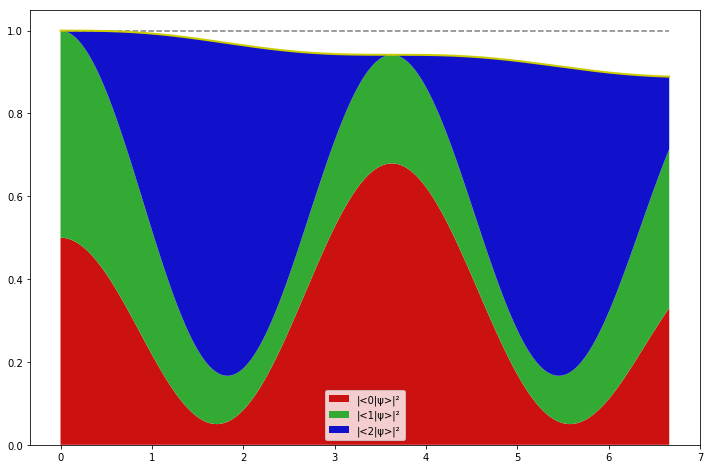

In [339]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(times, np.ones(NPLOTPOINTS), c='grey', linestyle='dashed')

ax.plot(times, norms**2, c='#cccc00', linewidth=2)

ax.stackplot(
    times,
    np.abs(evolution[0])**2,
    np.abs(evolution[1])**2,
    np.abs(evolution[2])**2,
    
    labels=labels, colors=colors
)

ax.legend(loc='lower center')

plt.show()

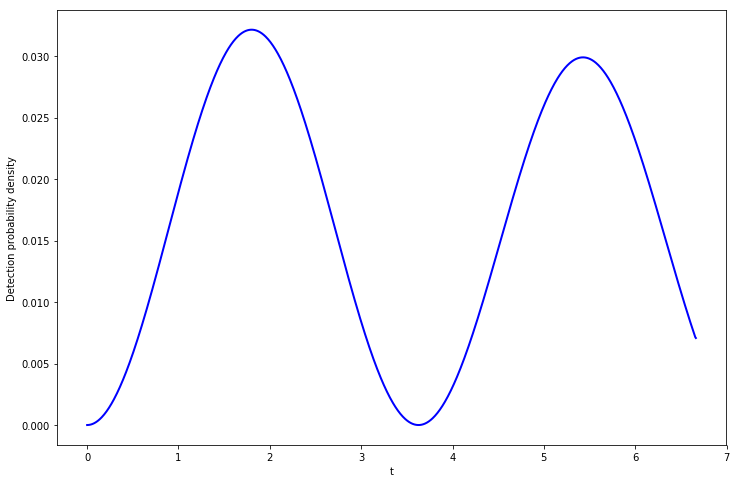

In [340]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlabel('t')
ax.set_ylabel('Detection probability density')
ax.plot(times, -np.gradient(norms**2, times), c='b', linewidth=2)

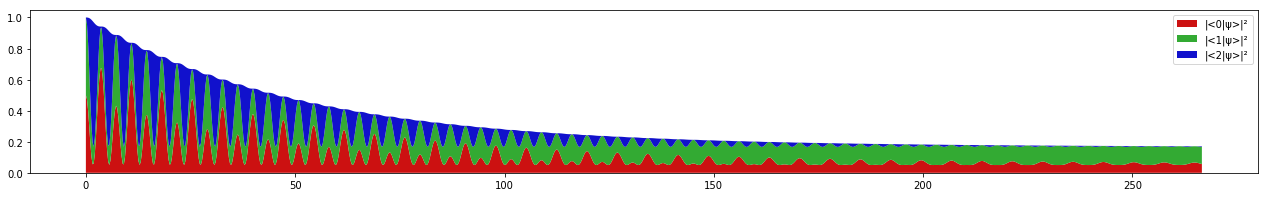

In [341]:
labels = PROB_LABELS
colors = ["#cc1111", "#33aa33", "#1111cc"]

fig, ax = plt.subplots(figsize=(22, 3))

ax.stackplot(
    times_extended,
    np.abs(evolution_extended[0])**2,
    np.abs(evolution_extended[1])**2,
    np.abs(evolution_extended[2])**2,
    
    labels=labels, colors=colors
)

ax.legend(loc='upper right')

plt.show()

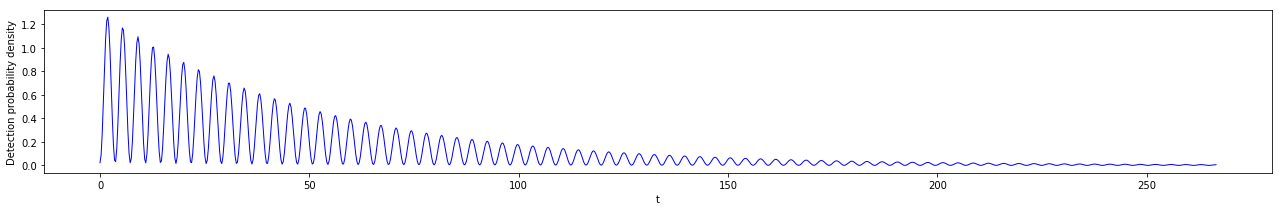

In [342]:
fig, ax = plt.subplots(figsize=(22, 3))
ax.set_xlabel('t')
ax.set_ylabel('Detection probability density')
ax.plot(times_extended, -np.gradient(norms_extended**2, times), c='b', linewidth=1)

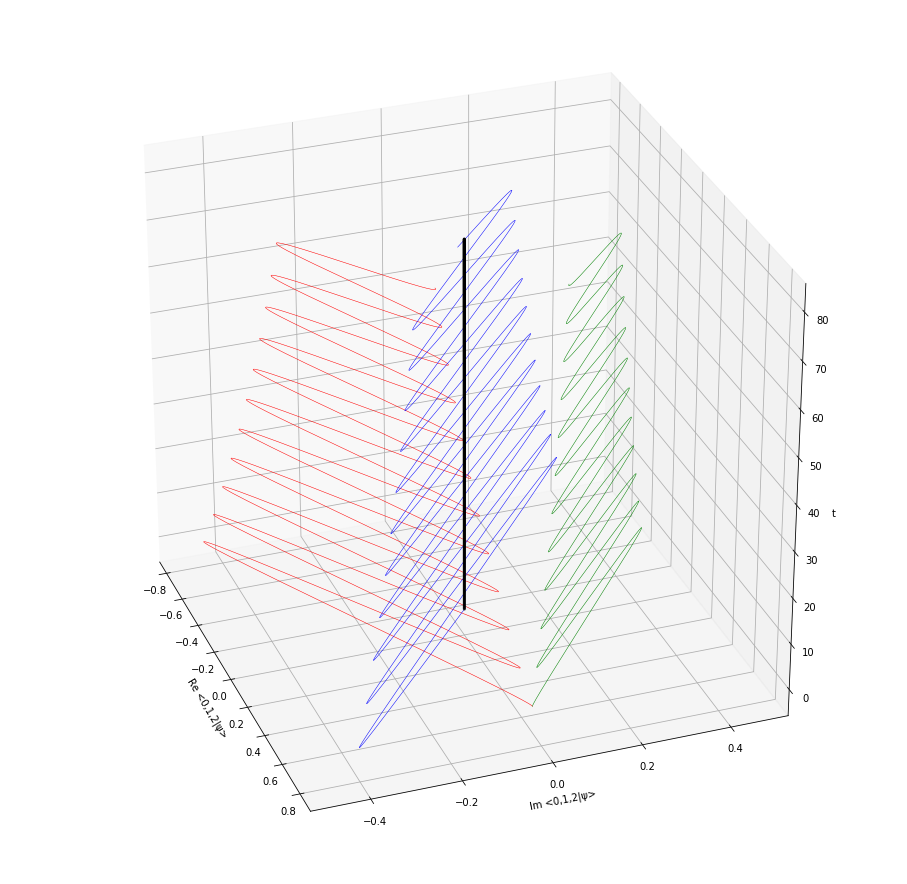

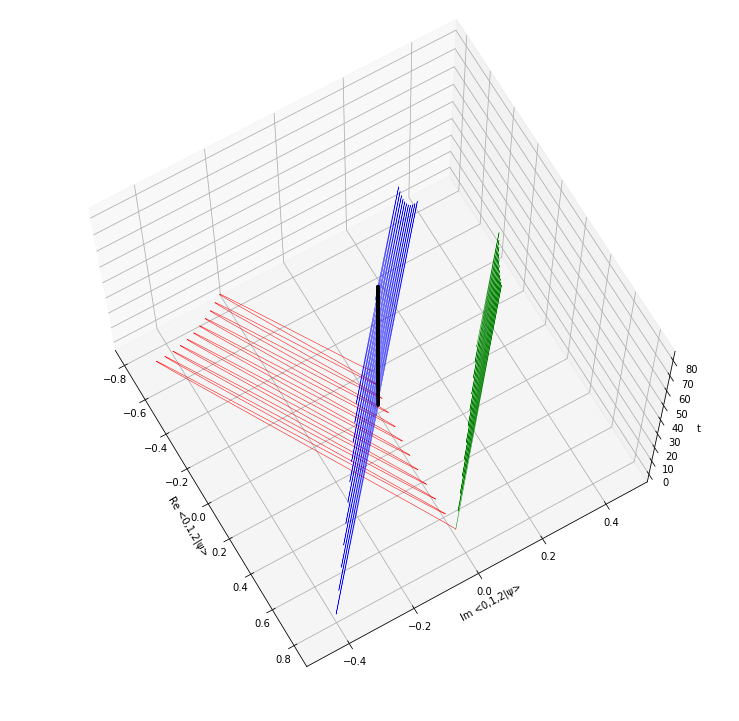

In [347]:
# W/ complex potential AND extended time

# 3D parametric plot
for (vertical_angle, horizontal_angle, height, width) in (30, -20, 16, 16), (70, -30, 13, 13):
    fig = plt.figure(figsize=(width, height))


    ax = fig.gca(projection='3d')

    ax.view_init(vertical_angle, horizontal_angle) # rotate 3d point of view

    ax.set_xlabel('Re <0,1,2|\u03C8>')
    ax.set_ylabel('Im <0,1,2|\u03C8>')
    ax.set_zlabel('t')

    ax.scatter(
        np.zeros(NPLOTPOINTS, dtype=np.float),
        np.zeros(NPLOTPOINTS, dtype=np.float),
        times_more,

        #c = rgbs_extended, # todo?
        c= 'k',
        s = 4
    )
    for i in 0, 1, 2:
        ax.plot(
            np.real(evolution_more[i]),
            np.imag(evolution_more[i]),
            times_more,

            #marker = '.',
            #depthshade=False,
            #s = (probs[i]**2)*40,
            c = _c[i],
            linewidth=0.5
        )

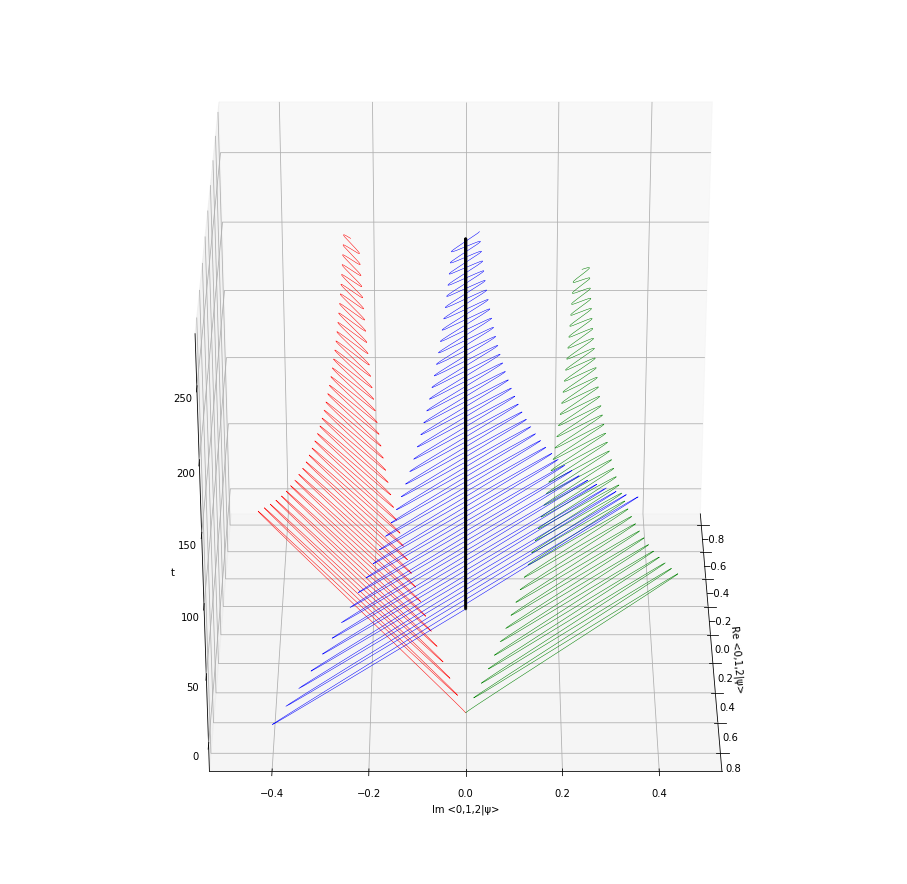

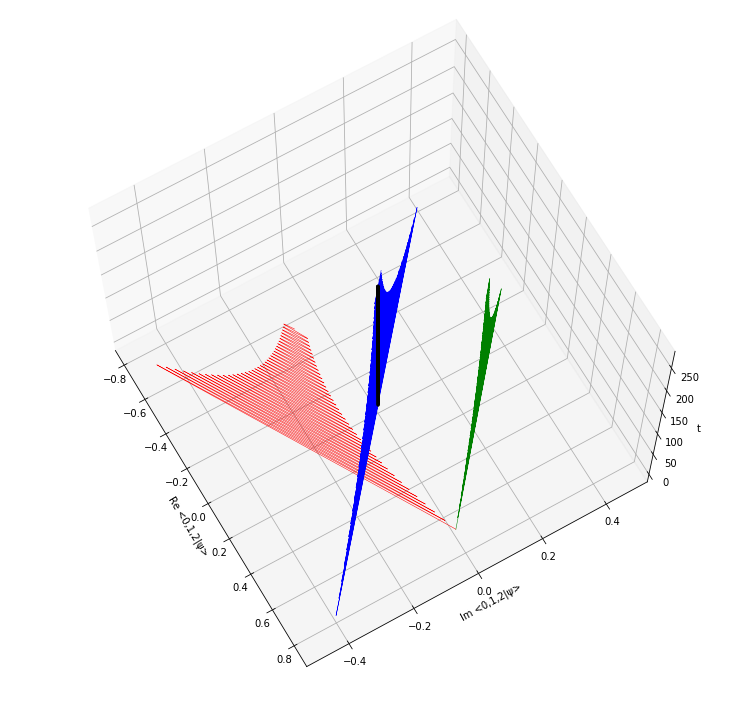

In [350]:
# W/ complex potential AND extended time

# 3D parametric plot
for (vertical_angle, horizontal_angle, height, width) in (30, 0, 16, 16), (70, -30, 13, 13):
    fig = plt.figure(figsize=(width, height))


    ax = fig.gca(projection='3d')

    ax.view_init(vertical_angle, horizontal_angle) # rotate 3d point of view

    ax.set_xlabel('Re <0,1,2|\u03C8>')
    ax.set_ylabel('Im <0,1,2|\u03C8>')
    ax.set_zlabel('t')

    ax.scatter(
        np.zeros(NPLOTPOINTS, dtype=np.float),
        np.zeros(NPLOTPOINTS, dtype=np.float),
        times_extended,

        #c = rgbs_extended, # todo?
        c= 'k',
        s = 4
    )
    for i in 0, 1, 2:
        ax.plot(
            np.real(evolution_extended[i]),
            np.imag(evolution_extended[i]),
            times_extended,

            #marker = '.',
            #depthshade=False,
            #s = (probs[i]**2)*40,
            c = _c[i],
            linewidth=0.5
        )